<a href="https://colab.research.google.com/github/dvenkata/AMATH590/blob/main/ExploreTurbulenceData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
X = np.load('/content/drive/MyDrive/Colab Notebooks/vel3_cutout.npy')
X = X.reshape((X.shape[0])**3,X.shape[3],X.shape[4])
X.shape

(134217728, 3, 2)

In [6]:
nx1 = round(X.shape[0]**(1/3))
ny1 = round(X.shape[0]**(1/3))
nz1 = round(X.shape[0]**(1/3))
tt1 = X.shape[2]
Y = np.zeros((nx1,ny1,nz1,tt1))

In [7]:
#Compute Energy
u = np.zeros((X.shape[0],1,X.shape[2]))
u[:,0,:] = X[:,0,:]**2 + X[:,1,:]**2 + X[:,2,:]**2

In [8]:
u = u.reshape((X.shape[0]*X.shape[2],1),order='F')

In [9]:
#Get a 3D cube of kinetic energy
count = 0
for tt in range(tt1):
  for ii in range(nx1):
    for jj in range(ny1):
      for kk in range(nz1):
        Y[ii,jj,kk,tt] = u[count,0]
        count += 1

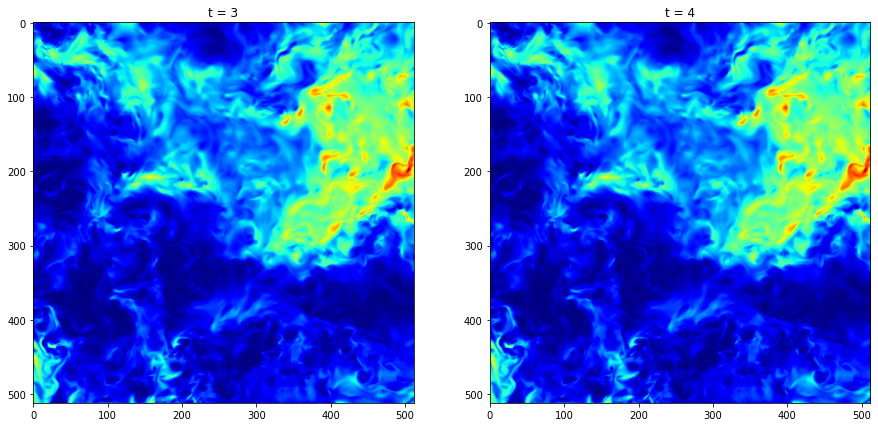

In [18]:
#Plot a surface at a given z, over time
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,15))
a = fig.add_subplot(121)
a.title.set_text('t = 3')
a.imshow(Y[:,:,0,0], cmap='jet')

a = fig.add_subplot(122)
a.title.set_text('t = 4')
a.imshow(Y[:,:,0,1], cmap='jet')